# Introduction to data manipulation with scientific Python

In this section we'll go through the basics of the scientific Python stack for data manipulation: using numpy and matplotlib.

*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux

You can skip this section if you already know the scipy stack.

**To learn the scientific Python ecosystem**: http://scipy-lectures.org

In [ ]:
# Start pylab inline mode, so figures will appear in the notebook
%matplotlib inline

## Numpy Arrays

Manipulating `numpy` arrays is an important part of doing machine learning
(or, really, any type of scientific computation) in Python.  This will likely
be review for most: we'll quickly go through some of the most important features.

In [ ]:
import numpy as np

# Generating a random array
X = np.random.random((3, 5))  # a 3 x 5 array

print(X)

[[ 0.99853305  0.80815968  0.67653016  0.91104577  0.13580875]
 [ 0.65895884  0.0418141   0.59611187  0.27454792  0.06338579]
 [ 0.17955444  0.9047559   0.77102769  0.65065809  0.04802844]]


In [ ]:
# Accessing elements

# get a single element
print(X[0, 0])

# get a row
print(X[1])

# get a column
print(X[:, 1])

0.998533054199
[ 0.65895884  0.0418141   0.59611187  0.27454792  0.06338579]
[ 0.80815968  0.0418141   0.9047559 ]


In [ ]:
# Transposing an array
print(X.T)

[[ 0.99853305  0.65895884  0.17955444]
 [ 0.80815968  0.0418141   0.9047559 ]
 [ 0.67653016  0.59611187  0.77102769]
 [ 0.91104577  0.27454792  0.65065809]
 [ 0.13580875  0.06338579  0.04802844]]


In [ ]:
# Turning a row vector into a column vector
y = np.linspace(0, 12, 5)
print(y)

[  0.   3.   6.   9.  12.]


In [ ]:
# make into a column vector
print(y[:, np.newaxis])

[[  0.]
 [  3.]
 [  6.]
 [  9.]
 [ 12.]]


There is much, much more to know, but these few operations are fundamental to what we'll
do during this tutorial.

## Scipy Sparse Matrices

We won't make very much use of these in this tutorial, but sparse matrices are very nice
in some situations.  For example, in some machine learning tasks, especially those associated
with textual analysis, the data may be mostly zeros.  Storing all these zeros is very
inefficient.  We can create and manipulate sparse matrices as follows:

In [ ]:
from scipy import sparse

# Create a random array with a lot of zeros
X = np.random.random((10, 5))
print(X)

[[ 0.11164878  0.33748926  0.29958185  0.71133657  0.20996204]
 [ 0.85534487  0.98468969  0.54620849  0.56799143  0.07525172]
 [ 0.75302347  0.14281611  0.95559026  0.65115273  0.70639037]
 [ 0.68196942  0.85545729  0.56865468  0.94844833  0.38803571]
 [ 0.67087439  0.54469757  0.02471429  0.2925888   0.40073668]
 [ 0.45976984  0.86403771  0.87732907  0.96841683  0.76223034]
 [ 0.10866839  0.31437237  0.23801478  0.35975893  0.7307786 ]
 [ 0.28420448  0.88799643  0.21302175  0.47106162  0.98370957]
 [ 0.91733683  0.438087    0.95791127  0.73590795  0.39027075]
 [ 0.37783327  0.47008887  0.47059343  0.81125514  0.92979464]]


In [ ]:
# set the majority of elements to zero
X[X < 0.7] = 0
print(X)

[[ 0.          0.          0.          0.71133657  0.        ]
 [ 0.85534487  0.98468969  0.          0.          0.        ]
 [ 0.75302347  0.          0.95559026  0.          0.70639037]
 [ 0.          0.85545729  0.          0.94844833  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.86403771  0.87732907  0.96841683  0.76223034]
 [ 0.          0.          0.          0.          0.7307786 ]
 [ 0.          0.88799643  0.          0.          0.98370957]
 [ 0.91733683  0.          0.95791127  0.73590795  0.        ]
 [ 0.          0.          0.          0.81125514  0.92979464]]


In [ ]:
# turn X into a csr (Compressed-Sparse-Row) matrix
X_csr = sparse.csr_matrix(X)
print(X_csr)

  (0, 3)	0.711336571799
  (1, 0)	0.855344868467
  (1, 1)	0.984689690295
  (2, 0)	0.753023469296
  (2, 2)	0.955590260053
  (2, 4)	0.706390372639
  (3, 1)	0.855457289489
  (3, 3)	0.948448330792
  (5, 1)	0.864037705124
  (5, 2)	0.877329066817
  (5, 3)	0.968416826849
  (5, 4)	0.762230338188
  (6, 4)	0.73077860332
  (7, 1)	0.887996426658
  (7, 4)	0.983709569912
  (8, 0)	0.917336825279
  (8, 2)	0.957911271858
  (8, 3)	0.735907954112
  (9, 3)	0.811255140493
  (9, 4)	0.929794635796


In [ ]:
# convert the sparse matrix to a dense array
print(X_csr.toarray())

[[ 0.          0.          0.          0.71133657  0.        ]
 [ 0.85534487  0.98468969  0.          0.          0.        ]
 [ 0.75302347  0.          0.95559026  0.          0.70639037]
 [ 0.          0.85545729  0.          0.94844833  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.86403771  0.87732907  0.96841683  0.76223034]
 [ 0.          0.          0.          0.          0.7307786 ]
 [ 0.          0.88799643  0.          0.          0.98370957]
 [ 0.91733683  0.          0.95791127  0.73590795  0.        ]
 [ 0.          0.          0.          0.81125514  0.92979464]]


## Matplotlib

Another important part of machine learning is visualization of data.  The most common
tool for this in Python is `matplotlib`.  It is an extremely flexible package, but
we will go over some basics here.

First, something special to IPython notebook.  We can turn on the "IPython inline" mode,
which will make plots show up inline in the notebook.

In [ ]:
%matplotlib inline

In [ ]:
# Here we import the plotting functions
import matplotlib.pyplot as plt

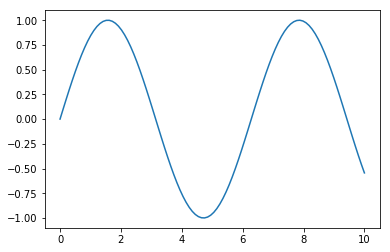

In [ ]:
# plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))

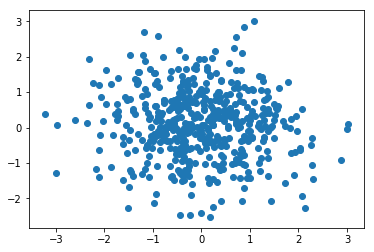

In [ ]:
# scatter-plot points
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y)

In [ ]:
# showing images
x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

(100, 100)


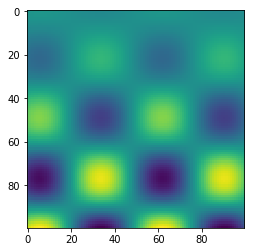

In [ ]:
# imshow - note that origin is at the top-left by default!
plt.imshow(im)

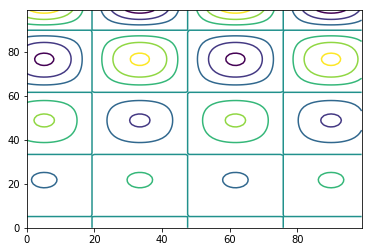

In [ ]:
# Contour plot - note that origin here is at the bottom-left by default!
plt.contour(im)

There are many, many more plot types available.  One useful way to explore these is by
looking at the matplotlib gallery: http://matplotlib.org/gallery.html

You can test these examples out easily in the notebook: simply copy the ``Source Code``
link on each page, and put it in a notebook using the ``%load`` magic.
For example:

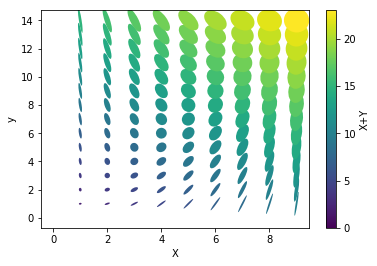

In [ ]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/ellipse_collection.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:, np.newaxis], Y.ravel()[:, np.newaxis]))

ww = X/10.0
hh = Y/15.0
aa = X*9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')